<a href="https://colab.research.google.com/github/vjihye/TIL/blob/master/3_10__Filter_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [6]:
img_width = 180
img_height = 180
layer_name = 'conv3_block4_out'

In [4]:
model = keras.applications.ResNet50V2(weights = 'imagenet', include_top=False )

94683136/94668760 [==============================] - 1s 0us/step


In [7]:
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.inputs, outputs=layer.output)

In [8]:
def compute_loss(input_image, filter_index):
  activation = feature_extractor(input_image)
  filter_activation = activation[:, 2:-2, 2:-2, filter_index]
  return tf.reduce_mean(filter_activation)

In [10]:
@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
  with tf.GradientTape() as tape:
    tape.watch(img)
    loss = compute_loss(img, filter_index)
    grads = tape.gradient(loss, img)
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return loss, img

In [11]:
def initialize_image():
  img = tf.random.uniform((1, img_width, img_height, 3))
  return(img-0.5) * 0.25

def visualize_filter(filter_index):
  iterations = 30
  learning_rate = 10.0
  img = initialize_image()
  for iteration in range(iterations):
    loss, img = gradient_ascent_step(img, filter_index, learning_rate)

  img = deprocess_image(img[0].numpy())
  return loss, img

In [14]:
def deprocess_image(img):
  img -= img.mean()
  img /= img.std() + 1e-5
  img *= 0.15

  img = img[25:-25, 25:-25, :]
  img += 0.5
  img = np.clip(img, 0, 1)

  img *= 255
  img = np.clip(img, 0, 255).astype("uint8")
  return img

In [15]:
from IPython.display import Image, display
loss, img = visualize_filter(0)
keras.preprocessing.image.save_img("0.png", img)
display(Image("0.png"))

In [16]:
all_imgs = []
for filter_index in range(64):
  print("processing filter %d" % (filter_index,))
  loss, img = visualize_filter(filter_index)
  all_imgs.append(img)

processing filter 0
processing filter 1
processing filter 2
processing filter 3
processing filter 4
processing filter 5
processing filter 6
processing filter 7
processing filter 8
processing filter 9
processing filter 10
processing filter 11
processing filter 12
processing filter 13
processing filter 14
processing filter 15
processing filter 16
processing filter 17
processing filter 18
processing filter 19
processing filter 20
processing filter 21
processing filter 22
processing filter 23
processing filter 24
processing filter 25
processing filter 26
processing filter 27
processing filter 28
processing filter 29
processing filter 30
processing filter 31
processing filter 32
processing filter 33
processing filter 34
processing filter 35
processing filter 36
processing filter 37
processing filter 38
processing filter 39
processing filter 40
processing filter 41
processing filter 42
processing filter 43
processing filter 44
processing filter 45
processing filter 46
processing filter 47
pr

In [17]:
margin = 5
n=8
cropped_width = img_width-25*2
cropped_height = img_height-25*2
width = n*cropped_width + (n-1) * margin
height=n*cropped_height + (n-1) * margin
stitched_filters = np.zeros((width, height,3))

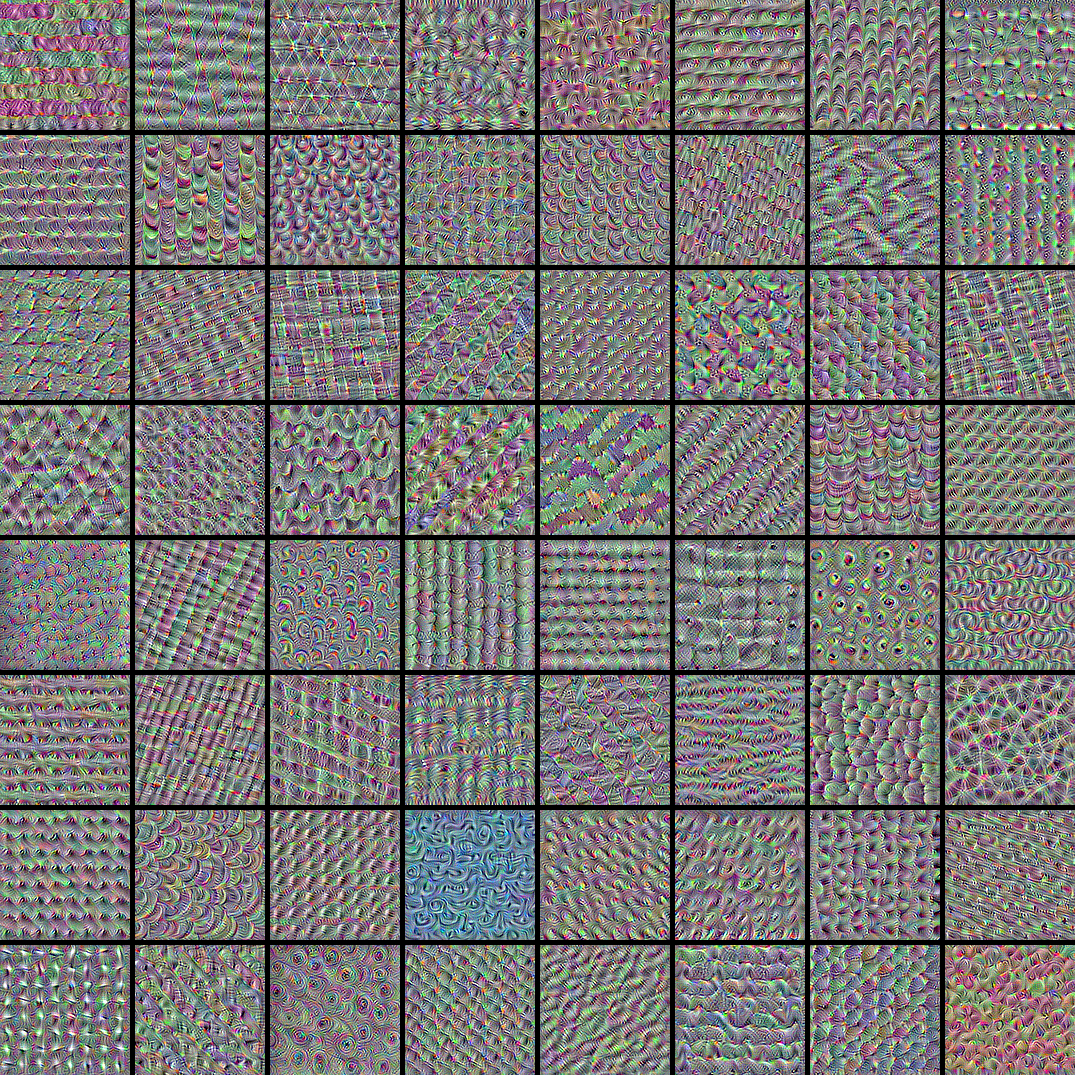

In [20]:
for i in range(n):
  for j in range(n):
    img = all_imgs[i * n + j]
    stitched_filters[
                     (cropped_width + margin) * i : (cropped_width + margin)* i + cropped_width,
                     (cropped_height + margin) * j : (cropped_height + margin) * j
                     + cropped_height,
                     :,
                     ] = img
keras.preprocessing.image.save_img("stiched_filters.png", stitched_filters)

from IPython.display import Image, display
display(Image("stiched_filters.png"))